In [135]:
import pandas as pd
import json
import seaborn as sns
import plotly.express as px

# Seaborn config:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")


import cleaning_functions as cf
from config import matches_list
from config import history_list

# Club csv:

In [2]:
clubs=pd.read_csv("Data/clubs.csv")

In [3]:
clubs

,id,country,name,zone_id,saas,status
0,875d32df-3dea-4cf4,Italy,Padel Elite Top Club,Europe/Rome,ANEMONE,ACTIVE
1,875d33df-3dea-4df4,Italy,Padel Center,Europe/Rome,ANEMONE,ACTIVE
2,da7cb23b-43b3-11e8,Spain,Europadel,Europe/Madrid,ANEMONE,ACTIVE
3,da7cb22b-43b3-11e8,Spain,Centro Padel,Europe/Madrid,ANEMONE,ACTIVE
4,a328d271-7036-47b4,Denmark,World of Padel,Europe/Copenhagen,ANEMONE,ACTIVE
5,cc3b6516-7bfc-4504,Denmark,Padel Box,Europe/Copenhagen,ANEMONE,ACTIVE
6,da79175c-43b3-11e8,Spain,Pádel Madrid,Europe/Madrid,SYLTEKCRM,ACTIVE
7,da78dd3c-43b3-11e8,Spain,Pádel Club,Europe/Madrid,SYLTEKCRM,ACTIVE
8,a7cde49f-630d-41eb,España,Pádel Club,Europe/Madrid,SYLTEKCRM,ACTIVE
9,da76cbee-43b3-11e8,Spain,Padel Indoor,Europe/Madrid,SYLTEKCRM,ACTIVE


In [4]:
clubs.country.unique()

array(['Italy', 'Spain', 'Denmark', 'España', 'Belgium', 'Mexico'],
      dtype=object)

In [5]:
clubs=clubs.replace({"España":"Spain"})

In [6]:
clubs.country.unique()

array(['Italy', 'Spain', 'Denmark', 'Belgium', 'Mexico'], dtype=object)

# Matches json:

In [7]:
matches=pd.DataFrame(matches_list)

In [8]:
matches.head()

,_id,is_canceled,created_at,start_date,end_date,owner_id,sport_id,club_info,registered_users
0,a57512cb-72da-4136,False,2021-12-30 12:20:02.793 UTC,2021-12-30 13:00:00 UTC,2021-12-30 13:30:00 UTC,AICKMMP,TENNIS,"[{'club_id': 'da78dd3c-43b3-11e8', 'club_name'...","[{'user_id': 'AICKMMP', 'registration_date': '..."
1,644817a3-6bc2-4e34,False,2021-11-07 19:14:45.37 UTC,2021-11-07 18:30:00 UTC,2021-11-07 19:00:00 UTC,AKPKMI,TENNIS,"[{'club_id': 'da78dd3c-43b3-11e8', 'club_name'...","[{'user_id': 'AKPKMI', 'registration_date': '2..."
2,cae7df5b-c7c6-4254,False,2021-10-31 13:21:11.241 UTC,2021-11-01 12:00:00 UTC,2021-11-01 12:30:00 UTC,CPAPMM,PADEL,"[{'club_id': 'da78dd3c-43b3-11e8', 'club_name'...","[{'user_id': 'CPAPMM', 'registration_date': '2..."
3,93a9a542-a91a-4342,True,2021-10-07 17:37:23.694 UTC,2021-10-11 08:00:00 UTC,2021-10-11 09:30:00 UTC,IKMPK,PADEL,"[{'club_id': 'da78dd3c-43b3-11e8', 'club_name'...","[{'user_id': 'IKMPK', 'registration_date': '20..."
4,42680533-6e5d-43e6,False,2021-10-02 09:06:17.116 UTC,2021-10-09 09:00:00 UTC,2021-10-09 10:00:00 UTC,ACPAIME,TENNIS,"[{'club_id': 'da78dd3c-43b3-11e8', 'club_name'...","[{'user_id': 'ACPAIME', 'registration_date': '..."


In [9]:
matches=matches.drop(["club_info", "registered_users"], axis=1)

In [10]:
matches.head()

,_id,is_canceled,created_at,start_date,end_date,owner_id,sport_id
0,a57512cb-72da-4136,False,2021-12-30 12:20:02.793 UTC,2021-12-30 13:00:00 UTC,2021-12-30 13:30:00 UTC,AICKMMP,TENNIS
1,644817a3-6bc2-4e34,False,2021-11-07 19:14:45.37 UTC,2021-11-07 18:30:00 UTC,2021-11-07 19:00:00 UTC,AKPKMI,TENNIS
2,cae7df5b-c7c6-4254,False,2021-10-31 13:21:11.241 UTC,2021-11-01 12:00:00 UTC,2021-11-01 12:30:00 UTC,CPAPMM,PADEL
3,93a9a542-a91a-4342,True,2021-10-07 17:37:23.694 UTC,2021-10-11 08:00:00 UTC,2021-10-11 09:30:00 UTC,IKMPK,PADEL
4,42680533-6e5d-43e6,False,2021-10-02 09:06:17.116 UTC,2021-10-09 09:00:00 UTC,2021-10-09 10:00:00 UTC,ACPAIME,TENNIS


#### Users:

In [11]:
users=cf.get_users(matches_list)

In [12]:
users.head()

,user_id,registration_date,price,currency
0,AICKMMP,2021-12-30 12:21:02.793 UTC,6.25,EUR
1,AKPKMI,2021-11-07 19:15:45.37 UTC,7.25,EUR
2,CPAPMM,2021-10-31 13:22:11.241 UTC,7.75,EUR
3,IKMPK,2021-10-07 17:38:23.694 UTC,10.50,EUR
4,ACPAIME,2021-10-02 09:07:17.116 UTC,12.50,EUR


#### Clubs:

In [13]:
clubs_info=cf.get_infoclub(matches_list)

In [14]:
clubs_info.sample(10)

,club_id,club_name,city,Latitud,Longitud
91934,a7cde49f-630d-41eb,Pádel Club,Madrid,40.386939,-3.623781
80851,bc8152b7-f04e-450e,Club el Padelito,Cuajimalpa,19.363058,-99.289435
21632,da79175c-43b3-11e8,Pádel Madrid,Madrid,40.502622,-3.673856
27181,cc3b6516-7bfc-4504,Padel Box,Odense C,55.412579,10.385509
66475,875d32df-3dea-4cf4,Padel Elite Top Club,Paderno Dugnano,45.564150,9.151457
34230,875d32df-3dea-4cf4,Padel Elite Top Club,Paderno Dugnano,45.564150,9.151457
61081,98e6583b-0ba1-4f15,Pro Padel Point,Edegem,51.150648,4.424731
27355,cc3b6516-7bfc-4504,Padel Box,Odense C,55.412579,10.385509
17041,da78dd3c-43b3-11e8,Pádel Club,Madrid,40.499493,-3.713107
11220,da78dd3c-43b3-11e8,Pádel Club,Madrid,40.499493,-3.713107


#### Concatenated dataframe with all information:

In [15]:
total = pd.concat([matches, clubs_info, users], axis=1)

In [16]:
total.head(2)

,_id,is_canceled,created_at,start_date,end_date,owner_id,sport_id,club_id,club_name,city,Latitud,Longitud,user_id,registration_date,price,currency
0,a57512cb-72da-4136,False,2021-12-30 12:20:02.793 UTC,2021-12-30 13:00:00 UTC,2021-12-30 13:30:00 UTC,AICKMMP,TENNIS,da78dd3c-43b3-11e8,Pádel Club,Madrid,40.499493,-3.713107,AICKMMP,2021-12-30 12:21:02.793 UTC,6.25,EUR
1,644817a3-6bc2-4e34,False,2021-11-07 19:14:45.37 UTC,2021-11-07 18:30:00 UTC,2021-11-07 19:00:00 UTC,AKPKMI,TENNIS,da78dd3c-43b3-11e8,Pádel Club,Madrid,40.499493,-3.713107,AKPKMI,2021-11-07 19:15:45.37 UTC,7.25,EUR


In [17]:
total.sort_values(by="created_at").head(1) # Data from 25.03.2021 until 15.01.2022

,_id,is_canceled,created_at,start_date,end_date,owner_id,sport_id,club_id,club_name,city,Latitud,Longitud,user_id,registration_date,price,currency
1555,740a0491-7a86-4217,True,2021-03-25 16:48:21.301 UTC,2021-10-07 15:30:00 UTC,2021-10-07 17:00:00 UTC,AEMGNN,PADEL,da7cb23b-43b3-11e8,Europadel,Alcorcón,40.33969,-3.808376,AEMGNN,2021-03-25 16:49:21.301 UTC,28.0,EUR


In [37]:
total["country"]=total.city.apply(cf.get_country)

In [38]:
total["creation_month"]=total["created_at"].apply(cf.get_month)

In [39]:
total["creation_year"]=total["created_at"].apply(cf.get_year)

In [40]:
total.sample()

,_id,is_canceled,created_at,start_date,end_date,owner_id,sport_id,club_id,club_name,city,Latitud,Longitud,user_id,registration_date,price,currency,country,creation_month,creation_year
67283,9d7a23df-aed8-4c8a,False,2021-10-08 14:41:04.037 UTC,2021-10-11 20:00:00 UTC,2021-10-11 21:30:00 UTC,AAGCEMP,PADEL,875d32df-3dea-4cf4,Padel Elite Top Club,Paderno Dugnano,45.56415,9.151457,AAGCEMP,2021-10-10 15:01:15.855 UTC,13.5,EUR,Italy,10,2021


#### 1. How many matches have been played overall?

70,985 matches have been played.

In [41]:
played=total.loc[(total["is_canceled"]== False)]

In [42]:
played.shape

(70985, 19)

#### 2. & 3. Where are we present and how are we performing? What can we expect for the upcoming months?

As you can see in the following graph and map, Playtomic is mainly present in Spain but it has also presence in other 4 countries: Italy, Denmark, Belgium and Mexico. 

In [146]:
fig = px.bar(clubs, x=clubs.country.value_counts().index, y=clubs.country.value_counts().values)
fig.show()


In [44]:
mapa=cf.map(matches_list)

In [45]:
mapa

According to the above graphs, we could say Playtomic is performing reallly well:
- In the first one, we can see that the ratio of cancellation per country is quite low, except in Italy.
- In the second one, taking into account our data is from 25/03/2021 until 15/01/2022, we can see how the number of matches played have been sharply increasingly, specially, from October onwards. 

Therefore, we could expect for the upcoming months an increase of the number of played match with a low ratio of cancellation. 

In [46]:
played_bycity=total.groupby(["country", "is_canceled"]).count()

In [47]:
played_bycity

_id  created_at  start_date  end_date  owner_id  \
country is_canceled                                                      
Belgium False         7793        7793        7793      7793      7793   
        True          2597        2597        2597      2597      2597   
Denmark False         3676        3676        3676      3676      3676   
        True           356         356         356       356       356   
Italy   False        18357       18357       18357     18357     18357   
        True          8408        8408        8408      8408      8408   
Mexico  False        10093       10093       10093     10093     10093   
        True          1796        1796        1796      1796      1796   
Spain   False        31066       31066       31066     31066     31066   
        True          9581        9581        9581      9581      9581   

                     sport_id  club_id  club_name   city  Latitud  Longitud  \
country is_canceled                                                           
Belgium False            7793     7793       7793   7793     7793      7793   
        True             2597     2597       2597   2597     2597      2597   
Denmark False            3676     3676       3676   3676     3676      3676   
        True              356      356        356    356      356       356   
Italy   False           18357    18357      18357  18357    18357     18357   
        True             8408     8408       8408   8408     8408      8408   
Mexico  False           10093    10093      10093  10093    10093     10093   
        True             1796     1796       1796   1796     1796      1796   
Spain   False           31066    31066      31066  31066    31066     31066   
        True             9581     9581       9581   9581     9581      9581   

                     user_id  registration_date  price  currency  \
country is_canceled                                                
Belgium False           7793               7793   7793      7793   
        True            2597               2597   2597      2597   
Denmark False           3676               3676   3676      3676   
        True             356                356    356       356   
Italy   False          18357              18357  18357     18357   
        True            8408               8408   8408      8408   
Mexico  False          10093              10093  10093     10093   
        True            1796               1796   1796      1796   
Spain   False          31066              31066  31066     31066   
        True            9581               9581   9581      9581   

                     creation_month  creation_year  
country is_canceled                                 
Belgium False                  7793           7793  
        True                   2597           2597  
Denmark False                  3676           3676  
        True                    356            356  
Italy   False                 18357          18357  
        True                   8408           8408  
Mexico  False                 10093          10093  
        True                   1796           1796  
Spain   False                 31066          31066  
        True                   9581           9581

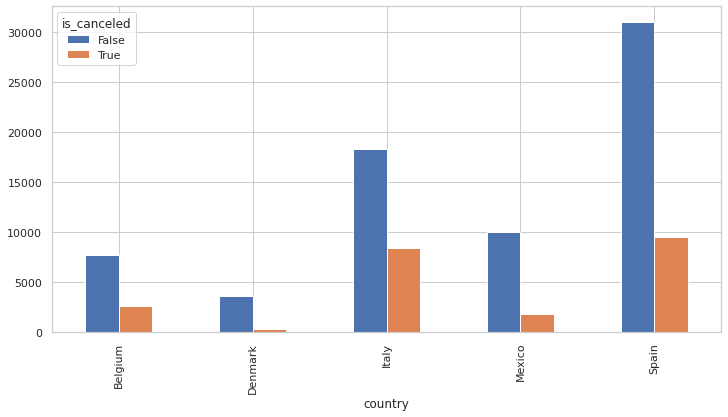

In [148]:
total.groupby(["country", "is_canceled"])["is_canceled"].count().unstack().plot(kind="bar");

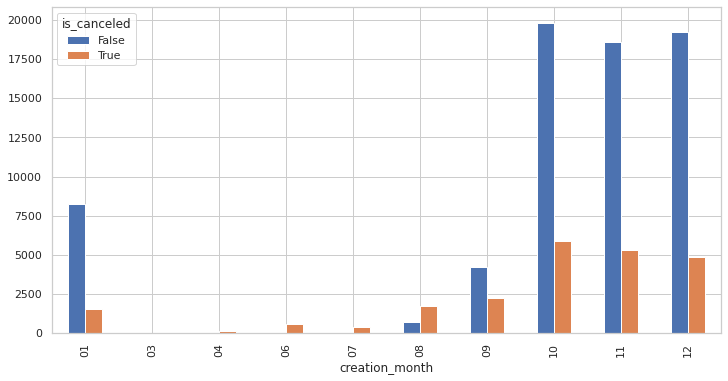

In [49]:
total.groupby(["creation_month", "is_canceled"])["is_canceled"].count().unstack().plot(kind="bar");

#### 4. How many active clubs do we have each month? 

As we can see both in the below dataset and in the graph, the number of clubs per month has increased from April 2021 to January 2022:
- April 2021: 1 club.
- May 2021: 0 clubs.
- June 2021: 1 club.
- July 2021: 2 clubs.
- August 2021: 1 club.
- September 2021: 8 clubs.
- November 2021: 9 clubs.
- December 2021: 9 clubs.
- January 2022: 9 clubs.

#### 5. How are they performing?

According to the above chart, "Pádel Club" is the club that is performing the best by bar followed by "Club El Padelito" and "Pádel Élito Top Club".

#### 6. & 7. Can we see some relevant trends? Do we have newcomers?

We can see how the number of clubs is progressively increasing. For example, in November we have a newcomer ("World of Padel") which is doing great in terms of number of matches played in its club.

In [53]:
played.groupby(["creation_month","club_name"]).count()

_id  is_canceled  created_at  \
creation_month club_name                                             
01             Club el Padelito      1085         1085        1085   
               Europadel              464          464         464   
               Padel Box              886          886         886   
               Padel Elite Top Club  1095         1095        1095   
               Padel Indoor           320          320         320   
               Pro Padel Point        909          909         909   
               Pádel Club            1743         1743        1743   
               Pádel Madrid           573          573         573   
               World of Padel        1173         1173        1173   
04             Club el Padelito         8            8           8   
06             Padel Elite Top Club    37           37          37   
07             Padel Elite Top Club    28           28          28   
               Pádel Madrid            14           14          14   
08             Padel Elite Top Club   725          725         725   
09             Club el Padelito        87           87          87   
               Europadel              547          547         547   
               Padel Box              188          188         188   
               Padel Elite Top Club  1650         1650        1650   
               Padel Indoor           120          120         120   
               Pro Padel Point        275          275         275   
               Pádel Club             790          790         790   
               Pádel Madrid           581          581         581   
10             Club el Padelito      3423         3423        3423   
               Europadel             1473         1473        1473   
               Padel Box             1555         1555        1555   
               Padel Elite Top Club  3215         3215        3215   
               Padel Indoor           800          800         800   
               Pro Padel Point       2242         2242        2242   
               Pádel Club            5145         5145        5145   
               Pádel Madrid          1972         1972        1972   
11             Club el Padelito      3110         3110        3110   
               Europadel             1355         1355        1355   
               Padel Box             1809         1809        1809   
               Padel Elite Top Club  2754         2754        2754   
               Padel Indoor           848          848         848   
               Pro Padel Point       2141         2141        2141   
               Pádel Club            4758         4758        4758   
               Pádel Madrid          1821         1821        1821   
               World of Padel          22           22          22   
12             Club el Padelito      2380         2380        2380   
               Europadel             1185         1185        1185   
               Padel Box             2145         2145        2145   
               Padel Elite Top Club  2270         2270        2270   
               Padel Indoor           810          810         810   
               Pro Padel Point       2226         2226        2226   
               Pádel Club            4193         4193        4193   
               Pádel Madrid          1554         1554        1554   
               World of Padel        2481         2481        2481   

                                     start_date  end_date  owner_id  sport_id  \
creation_month club_name                                                        
01             Club el Padelito            1085      1085      1085      1085   
               Europadel                    464       464       464       464   
               Padel Box                    886       886       886       886   
               Padel Elite Top Club        1095      1095      1095      1095   
               Padel Indoor                 320    

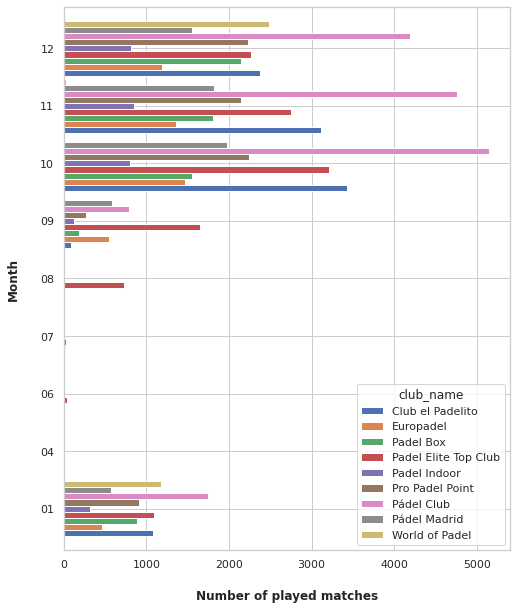

In [73]:
monthly=played.groupby(["creation_month", "club_name"])["club_name"].count().unstack().plot(kind="barh",figsize=(8, 10), zorder=1, width=0.95);
monthly.set_ylabel("Month", labelpad=20, weight='bold', size=12);
monthly.set_xlabel("Number of played matches", labelpad=20, weight='bold', size=12);


#### 8. How many matches have been published?

In [74]:
total.shape

(93723, 19)

93,723 matches were published.

#### 9. How many of these were canceled and why?

In [79]:
not_played=total.loc[(total["is_canceled"]== True)]

In [80]:
not_played.shape

(22738, 19)

22,738 matches were canceled out the total. According to the following json called "Matches history", the main reasons for cancellating are: 
- Missing players.
- No availability.
- Canceled by admin.

#### 10. Can you provide me with a list of users registered to my matches?

For example, let's say that the **Pádel Club manager** ask us for a list of users registered to its matches:

In [108]:
padel_club=total.loc[(total["club_name"]== "Pádel Club")]

In [109]:
users_list=list(padel_club["user_id"].unique())

In [110]:
users_list

['AICKMMP',
 'AKPKMI',
 'CPAPMM',
 'IKMPK',
 'ACPAIME',
 'EEPPCN',
 'CMMER',
 'AKMGPE',
 'ECPNAR',
 'IKAEMA',
 'EPMRRA',
 'NNNNIG',
 'CPCAAR',
 'IMAMIK',
 'ERRCNC',
 'EAAPCI',
 'EEANKK',
 'NGMCP',
 'GNPRIK',
 'CPCKEP',
 'IRRAE',
 'ACCPERI',
 'APENCI',
 'MAIRPC',
 'KPIPK',
 'MNGEGI',
 'GRARP',
 'EACKI',
 'ECPKNR',
 'ERRRGM',
 'AAPNMP',
 'KCNRA',
 'KGPKMN',
 'ICRCAC',
 'GREPGM',
 'EARGAN',
 'ACAANI',
 'CMECR',
 'ECNNIC',
 'KNAMIM',
 'ICPIRM',
 'MNPMRN',
 'KKNGMM',
 'AGREKNI',
 'KAEINC',
 'KECAN',
 'CKIAGP',
 'AKGAKKG',
 'AAGKAM',
 'EKKAE',
 'AGECEPR',
 'GKPRG',
 'EGCKRI',
 'CEREEK',
 'AKPIMAK',
 'MRNRAG',
 'CMKKK',
 'NRCGPC',
 'ERCGRN',
 'GNRCR',
 'ERRGRC',
 'EAGARN',
 'ECIKA',
 'CPCIGM',
 'KACIMG',
 'EAPIMP',
 'EEGMNR',
 'EPCCN',
 'GRKNNP',
 'EKCPGC',
 'IGCPG',
 'EAAKEK',
 'ANNCAI',
 'GACIM',
 'KEAKNC',
 'CPCEER',
 'MRNICK',
 'GPIPIC',
 'CKKEII',
 'ERRIMA',
 'ANPMCGI',
 'ERNIAN',
 'EKEPA',
 'EEPIPA',
 'EKNCA',
 'CPCGIA',
 'KIIAPG',
 'ERENKM',
 'MPCEGC',
 'ERMNKN',
 'GCNPP',
 'MCRIRR',
 

#### 11. How many users are coming back to my club?

If we stick to the previous example and we are still talking to the Pádel Club manager: we could tell him/her that there are 3,264 users that have come back to the club.

In [119]:
all_users=padel_club["user_id"].value_counts()

In [124]:
coming_back=all_users.loc[all_users>1]

In [129]:
df_back=coming_back.to_frame()

In [132]:
dicc={"user_id":"times_come_back"}

In [133]:
df_back.rename(columns=dicc)

,times_come_back
CMMER,561
AREEPG,526
CPCKEP,219
EANCAN,169
KENAR,95
...,...
KNKGKI,2
CRNGKN,2
KNRGR,2
AGCCKI,2


#### 12. Who are the my most valuable clients?

According to above df, I would say that their most valuable clients are CMMER and AREEPG as they are the most frequent clients in this club.

#### 13. What is my occupation rate?

At first glance, I wouldn't know which is a club occupation rate as I don't data related to the number of total courts in order to compare it with the occupied courts.

# Matches history json:

In [84]:
history=pd.DataFrame(history_list)

In [91]:
history

,_id,match_id,created_at,event_type,requester_type,requester_id,user_id,cancel_reason
1279,a9fb0e34-3623-4722,c6dd98a2-3d03-448e,2021-12-27 14:50:24.254 UTC,PLAYER_ADDED,SYSTEM,AAEGRAC,APCMIPN,NaN
1404,7e5c1bf9-f9bd-4244,361d6fce-1c8b-4e08,2021-12-15 12:07:48.895 UTC,PLAYER_ADDED,SYSTEM,AAGINAE,AIKNNRI,NaN
2286,7f3305bf-7714-47c1,c2b8582b-b079-44ab,2021-12-26 13:46:37.46 UTC,PLAYER_JOINED_AND_PAID,SYSTEM,AEMMGRC,AEMMGRC,NaN
2593,aeaed5a5-024b-469a,0bee92a1-d119-4512,2022-01-10 08:29:11.152 UTC,MATCH_CREATED,SYSTEM,AICMRRM,NaN,NaN
1567,f2ba87a3-eafc-424f,1673ea64-529d-477a,2021-12-03 18:01:56.064 UTC,PLAYER_LEFT,CUSTOMER,AAMCKIN,AAMCKIN,NaN
77,5070ccec-cbfc-41b6,c3745357-40de-4980,2021-11-27 11:31:58.902 UTC,PLAYER_ADDED,SYSTEM,SYSTEM,AGPERMK,NaN
3080,84eaa8aa-e912-4250,2b294194-48a3-4e8b,2021-12-25 20:32:25.297 UTC,PLAYER_REMOVED,CUSTOMER_OWNER,AREREMP,AGIRPNM,NaN
3116,199c662e-76e4-4886,2e05a1ec-9c6b-45aa,2022-01-04 10:10:33.706 UTC,PLAYER_ADDED,CLUB_MANAGER,ARNKEMA,ACERRPI,NaN
2817,c3115257-1d48-45e0,4160a82c-58ee-49df,2021-11-20 18:40:47.968 UTC,PLAYER_JOINED_AND_PAID,SYSTEM,AKEICPM,AKEICPM,NaN
543,99db2ceb-0a19-4f81,1e08e374-5d2f-40e5,2021-12-07 17:12:14.147 UTC,PLAYER_JOINED_AND_PAID,SYSTEM,AAECCKE,AAECCKE,NaN


In [92]:
history.shape

(3313, 8)

In [89]:
history["cancel_reason"].unique()

array([nan, 'CANCELED_MISSING_PLAYERS', 'NO_AVAILABILITY',
       'CANCELED_BY_ADMIN'], dtype=object)